In [1]:
%cd ..

C:\Users\georg\Documents\msc-project


In [31]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import preprocessing

In [3]:
df = pd.read_csv("data/interim/tracks.csv")

In [6]:
df.shape

(4127, 23)

In [67]:
features = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'duration_ms'
]

popularity_bins = [0,1e+4,1e+5,1e+6,1e+9]

data = preprocessing.MinMaxScaler().fit_transform(df[features])
targets = df['views'].apply(np.digitize,bins=popularity_bins)

<AxesSubplot:>

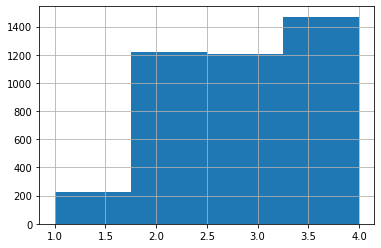

In [68]:
targets.hist(bins=4)

In [69]:
classes = preprocessing.OneHotEncoder(sparse=False).fit_transform(targets.values.reshape(-1,1))

In [70]:
model = keras.Sequential(
    [
        keras.Input(shape=(data.shape[1])),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(4, activation="softmax",name="predictions"),
    ]
)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)
model.fit(data,classes,validation_split=.2,epochs=100,batch_size=32)

Epoch 1/100
104/104 [==============================] - 0s 2ms/step - loss: 1.2688 - categorical_accuracy: 0.3511 - val_loss: 1.2975 - val_categorical_accuracy: 0.3232
Epoch 2/100
104/104 [==============================] - 0s 1ms/step - loss: 1.2498 - categorical_accuracy: 0.3644 - val_loss: 1.2751 - val_categorical_accuracy: 0.3232
Epoch 3/100
104/104 [==============================] - 0s 1ms/step - loss: 1.2453 - categorical_accuracy: 0.3599 - val_loss: 1.2729 - val_categorical_accuracy: 0.3232
Epoch 4/100
104/104 [==============================] - 0s 1ms/step - loss: 1.2462 - categorical_accuracy: 0.3644 - val_loss: 1.2873 - val_categorical_accuracy: 0.3232
Epoch 5/100
104/104 [==============================] - 0s 857us/step - loss: 1.2459 - categorical_accuracy: 0.3587 - val_loss: 1.2834 - val_categorical_accuracy: 0.3232
Epoch 6/100
104/104 [==============================] - 0s 852us/step - loss: 1.2466 - categorical_accuracy: 0.3496 - val_loss: 1.2751 - val_categorical_accuracy: 0

104/104 [==============================] - 0s 857us/step - loss: 1.2445 - categorical_accuracy: 0.3541 - val_loss: 1.2703 - val_categorical_accuracy: 0.3232
Epoch 50/100
104/104 [==============================] - 0s 862us/step - loss: 1.2464 - categorical_accuracy: 0.3578 - val_loss: 1.2785 - val_categorical_accuracy: 0.3232
Epoch 51/100
104/104 [==============================] - 0s 891us/step - loss: 1.2466 - categorical_accuracy: 0.3644 - val_loss: 1.2699 - val_categorical_accuracy: 0.3232
Epoch 52/100
104/104 [==============================] - 0s 867us/step - loss: 1.2458 - categorical_accuracy: 0.3644 - val_loss: 1.2726 - val_categorical_accuracy: 0.3232
Epoch 53/100
104/104 [==============================] - 0s 857us/step - loss: 1.2467 - categorical_accuracy: 0.3644 - val_loss: 1.2754 - val_categorical_accuracy: 0.3232
Epoch 54/100
104/104 [==============================] - 0s 857us/step - loss: 1.2445 - categorical_accuracy: 0.3566 - val_loss: 1.2730 - val_categorical_accuracy: 

104/104 [==============================] - 0s 833us/step - loss: 1.2459 - categorical_accuracy: 0.3644 - val_loss: 1.2779 - val_categorical_accuracy: 0.3232
Epoch 98/100
104/104 [==============================] - 0s 838us/step - loss: 1.2461 - categorical_accuracy: 0.3644 - val_loss: 1.2679 - val_categorical_accuracy: 0.3232
Epoch 99/100
104/104 [==============================] - 0s 876us/step - loss: 1.2456 - categorical_accuracy: 0.3553 - val_loss: 1.2742 - val_categorical_accuracy: 0.3232
Epoch 100/100
104/104 [==============================] - 0s 843us/step - loss: 1.2469 - categorical_accuracy: 0.3520 - val_loss: 1.2861 - val_categorical_accuracy: 0.3232
